In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Probability Intro

A *random variable* is an entity that takes on one of a range of possible values, each with a certain probability.  So, for example, each toss of a coin or roll of a die is a distinct realization of a random variable.  Often, we think of our "rows" of data as realizations of a (very complicated) random variable.

Imagine a sequence where a coin is flipped that has probability .6 of being heads and two dice are rolled.  One of the dice is a standard 6-sided die, but the other is a loaded die where the probabilities of the six sided are unbalanced.  Specifically, on the loaded die, the probability of a 1 is 1/2 while the probabilities of the other 5 sides are each 0.1.  An observer sees the result of one of the dice, depending on the coin toss.  If the coin is heads the observer sees the fair die, but if it is tails, she sees the loaded die.  However, the observer does not know which die she is seeing, she just sees the result.

In this scenario, what are the different random variables that we could define?


Below we will simulate many repeated trials of these random variables to try to develop some intuition around probability.

In [3]:
#Set the number of trials
num_obs = 1000

In [ ]:
# Simulate a coin toss (or more accurately num_obs of them)
# We will use the convention that "heads" is 1 and "tails" is 0
np.random.seed(42)

coin_toss = np.random.binomial(1,.6, num_obs)

In [16]:
coin_toss

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1,

In [6]:
#Type some code here to convince yourself that the data looks right
# E.g. plot, look at the raw data, look at summary statistics of the data

pd.Series(coin_toss).value_counts()

1    613
0    387
dtype: int64

(array([ 387.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  613.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

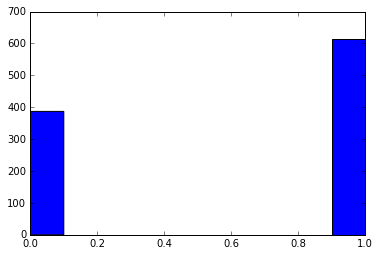

In [5]:
plt.hist(coin_toss)

In [ ]:
# Simulate a fair six-sided die roll
fair_die_roll = np.random.randint(1,7, num_obs)

In [17]:
fair_die_roll

array([4, 6, 3, 5, 1, 5, 6, 6, 1, 2, 1, 4, 3, 2, 1, 5, 2, 2, 1, 2, 5, 6, 2,
       6, 5, 1, 3, 2, 3, 5, 2, 6, 4, 3, 2, 3, 2, 1, 6, 3, 4, 4, 5, 2, 3, 5,
       3, 2, 4, 1, 4, 5, 6, 1, 5, 2, 1, 5, 2, 4, 6, 2, 3, 2, 2, 6, 3, 5, 5,
       2, 3, 3, 6, 4, 5, 6, 1, 5, 6, 5, 4, 1, 4, 1, 2, 6, 1, 4, 5, 1, 6, 1,
       3, 5, 6, 6, 2, 4, 2, 6, 5, 1, 1, 5, 6, 1, 1, 1, 4, 4, 3, 2, 5, 5, 5,
       3, 4, 6, 6, 3, 6, 5, 2, 1, 4, 4, 3, 4, 5, 6, 5, 3, 5, 6, 2, 3, 2, 1,
       2, 1, 1, 2, 3, 6, 5, 5, 6, 1, 1, 3, 4, 2, 1, 5, 3, 2, 3, 2, 2, 6, 1,
       3, 3, 6, 5, 5, 1, 1, 4, 6, 5, 2, 3, 1, 3, 3, 4, 5, 1, 3, 1, 2, 4, 2,
       1, 1, 5, 3, 3, 2, 4, 6, 3, 5, 2, 2, 6, 5, 4, 5, 4, 5, 5, 1, 2, 5, 6,
       5, 3, 2, 3, 2, 3, 5, 5, 1, 6, 3, 4, 1, 3, 3, 1, 5, 3, 5, 1, 5, 2, 4,
       3, 6, 4, 5, 3, 5, 2, 1, 3, 2, 2, 3, 5, 6, 2, 4, 2, 6, 5, 5, 4, 2, 5,
       6, 3, 1, 1, 1, 2, 4, 5, 3, 6, 3, 6, 2, 1, 2, 4, 4, 6, 5, 5, 6, 4, 4,
       4, 2, 4, 3, 1, 4, 6, 1, 2, 6, 1, 6, 2, 3, 2, 2, 6, 5, 4, 4, 3, 3, 4,
       5, 4,

In [8]:
#Sanity check this
pd.Series(fair_die_roll).value_counts()


2    176
5    174
4    171
1    167
6    163
3    149
dtype: int64

In [ ]:
#Simulate the loaded die using np.random.choice to create a custom discrete distribution

loaded_die_roll = np.random.choice(a = range(1,7), p = [.5, .1, .1 ,.1,.1,.1], size=num_obs)

In [18]:
loaded_die_roll

array([1, 3, 2, 6, 1, 6, 5, 1, 6, 1, 5, 1, 5, 5, 5, 4, 1, 1, 1, 1, 3, 1, 6,
       3, 5, 1, 5, 6, 1, 3, 4, 1, 2, 1, 1, 1, 1, 1, 1, 6, 2, 6, 1, 1, 2, 1,
       1, 3, 1, 3, 3, 1, 1, 4, 1, 1, 6, 1, 3, 6, 1, 1, 1, 1, 1, 3, 1, 2, 6,
       5, 3, 1, 3, 2, 1, 1, 5, 1, 1, 1, 1, 5, 4, 4, 1, 1, 1, 1, 1, 4, 1, 2,
       1, 1, 1, 6, 5, 6, 1, 1, 2, 1, 5, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 5, 6,
       4, 1, 3, 1, 1, 5, 1, 6, 1, 3, 3, 5, 3, 3, 1, 2, 1, 4, 2, 3, 1, 1, 4,
       1, 1, 1, 6, 4, 1, 1, 1, 4, 3, 1, 1, 1, 3, 4, 1, 1, 1, 6, 1, 4, 3, 1,
       1, 1, 3, 4, 3, 2, 1, 6, 4, 1, 6, 3, 2, 4, 5, 3, 1, 1, 6, 1, 1, 1, 1,
       3, 6, 1, 1, 1, 5, 3, 1, 5, 5, 5, 6, 1, 4, 1, 5, 4, 4, 3, 1, 2, 6, 6,
       1, 1, 1, 4, 5, 1, 2, 5, 4, 2, 2, 2, 1, 2, 3, 5, 3, 4, 1, 1, 1, 1, 4,
       6, 1, 1, 5, 1, 2, 4, 3, 1, 1, 4, 2, 1, 4, 1, 4, 1, 6, 1, 1, 1, 1, 5,
       6, 1, 1, 4, 5, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3,
       5, 1, 5, 1, 1, 1, 1, 4, 4, 4, 2, 1, 1, 1, 1, 1, 1, 2, 4, 6, 6, 3, 1,
       3, 4,

In [10]:
#Sanity check this
pd.Series(loaded_die_roll).value_counts()




1    498
3    109
5    106
4    103
6     92
2     92
dtype: int64

In [11]:
#Simulate the observed die.  If the coin is heads the observed die is the fair die, if it is tails it
#is the loaded die.  There is a quick and sneaky way to accomplish this.

observed_die_roll = coin_toss * fair_die_roll + (1-coin_toss) * loaded_die_roll

In [13]:
np.mean((observed_die_roll))

3.1120000000000001

In [ ]:
#Sanity check this


In [ ]:
# Lets look at the means - are they what we would expect?

print(np.mean(coin_toss))
print(np.mean(fair_die_roll))
print(np.mean(loaded_die_roll))
print(np.mean(observed_die_roll))

In [15]:
np.mean(coin_toss[observed_die_roll==4])

0.70068027210884354

0.613
3.498
2.503
3.112


## Distributions and Empirical Distributions

Empirical distributions refer to approximations of the "true" distribution obtained by sampling data and (essentially) making histograms.  For example, if we look at 1000 realizations of a coin toss we may see 510 heads and 490 tails.  The empirical distribution would be 51% heads, but the true underlying probability may be .5.  The idea is that as we get more and more data, the empirical distribution converges to the true distribution (this is the essence of the *Law of Large Numbers*).

In the above, we are using a true distribution to generate data, and examining the empirical distributions.  Typically, Data Science proceeds in the opposite direction -- we have data which we treat as coming from some theoretical distribution, and use it to try and learn about the "theoretical" underlying distribution.

## Independence of Random Variables

What does it mean for two random variables to be independent?

We have 4 variables: `coin_toss`, `fair_die_roll`, `loaded_die_roll`, `observed_die_roll`

For each pair of variables (how many pairs do we have?) think about whether the two variables in the pair are independent or not.



In [ ]:
### Type some code here to examine whether certain variables / events are independent or not
### e.g. plot distributions or calculate (empirical) probabilities




## Question:

Suppose `observed_die` = 1, what is the probability that `coin_toss` = 1?  Let's try to solve this analytically and also get an approximate (empirical) answer from our data.

In [19]:
#
print(np.sum(observed_die_roll==4))
print(np.sum((observed_die_roll==4) & (coin_toss == 1)))
10/14

147
103


0.7142857142857143

## Discussion of Probability Algebra and Bayes' Rule

Suppose we create a noisy version of the coin toss:

In [20]:
noisy_coin_toss = coin_toss + np.random.randn(num_obs)

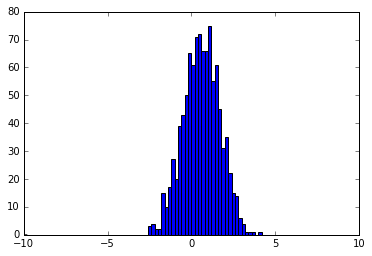

In [21]:
## Let's plot a histogram to look
plt.hist(noisy_coin_toss, bins = 100, range = (-10,10));

Let us "bin" the noisy coin toss into 3 cases: x<0, 0<=x<=1, and x>1

In [22]:
binned_nct = (noisy_coin_toss>1).astype(int) + (noisy_coin_toss>0).astype(int)

In [23]:
#unique, counts = np.unique(binned_nct, return_counts=True)
#print(np.asarray((unique, counts)).T)

pd.Series(binned_nct).value_counts()

2    367
1    336
0    297
dtype: int64

What is the distribution of `observed_die` given that `binned_nct` = 1?  Do you think `observed_die` is independent of the event `binned_nct` == 1?  Is `observed_die` independent of the random variable `binned_nct`?  What is the difference between the previous two statements?


How can we characterize "degrees" of independence?  Does it make sense to say that variables are "almost" independent or "very" dependent?  Does it matter if the variables are numerical or categorical?